## Assignment A1a: Jupyter Notebooks

Please follow the General Assignment Guidelines document on canvas under the Pages for completing this assignment.  When you have completed the assignment, please follow the Submission Instructions.

### Overview

In this assignment you will setup your jupyter notebook environment.  You will create a notebook, format text and equations, write code, and make basic plots.

Note that this and future assignments are not a step-by-step guides and there is usually not a single best approach or solution.  Part of the exercise is to figure things out and develop proficiency in searching through documentation, configuring your setup, and debugging installation issues.  Allow plenty of time for googling.

Also note that jupyter notebooks themselves are part of a much larger and rapidly developing ecosystem for interactive data science and scientific computing.  You are encouraged to explore and try things out.  There are numerous sources of information and ideas in the documentation, blogs, and discussion groups.

### Learning objectives

- install a working jupyter environment
- write text using markdown
- write equations using latex
- write code to implement simple functions
- make basic plots
- export your notebook to pdf for submission to canvas

***

### Setting up your Jupyter Environment

In this course, you will be completing your assignments primarily in a jupyter notebook, which provides an interactive development environment that allows you to write code, equations, visualizations, and text.

You first task is to setup a jupyter notebook environment on your system.  As a default starting point, I would recommend installing anaconda ([the individual edition](https://www.anaconda.com/products/individual)) and then jupyterlab (see [https://jupyter.org/install](https://jupyter.org/install)).  

There are numerous other installation possibilities, but all you need is to be able to create jupyter notebooks and write code in either python or julia.  The advantage of anaconda is that installs a standard python environment with numerous packages like numpy, scikit, etc.  If you use julia (which is what I use), you will need to install the [latest julia distribution](https://julialang.org) and the [IJulia package](https://github.com/JuliaLang/IJulia.jl).  It is also possible to use Matlab, which has it's own notebook environment, but you should instead install the matlab kernel in jupyterlab (google "jupyterlab matlab kernel").

There are many, many guides to getting started with jupyter notebooks on the web.  I encourage you to look around and let me know if you find some that are particularly helpful.  [Here is just one example](https://towardsdatascience.com/7-essential-tips-for-writing-with-jupyter-notebook-60972a1a8901).  
At this point, I would advise against getting too carried away with style and customization.  Focus on doing what's required for the assignments.  I would, however, recommend that you take the time to learn the keyboard commands for notebooks and code editing.  Minimizing your use of the mouse and menus will greatly improve your productivity.

Notebooks are most suitable for the exploration and development of short functions.  When your programs become more complex or more difficult to debug, it is usually more efficient to write and debug your code in a traditional IDE like [Atom](https://atom.io) or [Visual Studio Code](https://code.visualstudio.com).

Note that we do not recommend a specific plotting library, as there are numerous choices, and which one you prefer depends on factors like what you are already familiar with, what you're interested in learning, or the functionality you need.  For python, a common choice is [matplotlib](https://matplotlib.org).  In julia, the [Plots.jl package](https://github.com/JuliaPlots/Plots.jl) provides a standard interface to several different backends.  You should feel free to explore others.

***

### 1. Markdown and latex

You can get started with markdown with the jupyter documentation on [markdown cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).  Also see [learn markdown in 60 secs](https://commonmark.org/help/).

A comprehensive reference to latex is the [katex supported functions](https://katex.org/docs/supported.html) page.

**1a.** Use markdown and latex to write a short description of the univariate normal probability distribution function (pdf) $p(x | \mu, \sigma)$.  


**1b.** Explain how the joint probability of independent random variables (with the same mean and variance) $p(x_{1:N} | \mu, \sigma)$ is the product of the univariate pdfs.

Your answers should:
- use the standard greek symbols for the mean and variance
- show the equations for the pdf and the joint pdf on their own separate lines
- write the product in both the general form as the product of functions, and in explicit form, where the product is pushed into the exponent.  You should have two equations and put them on separate lines using the latex align environment.
- use explicit index limits for the product and sums

1a. The univariate normal probability distribution function (pdf) can be represented as 
$$
p(x|\mu, \sigma)
$$ 
which is a function that describes the continuous variable, X, and the chances of finding a value b of X. Mathematically, this is represented as $p(X<b) = \int_{-\infty}^x p(x|\mu, \sigma) dx$. Additionally, the function representing the normal pdf with $\mu = 0$ and $\sigma = 1$ is given as
$$
p(x|\mu=0, \sigma=1) = \frac{e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}}{\sigma\sqrt{2\pi}}
$$

1b. The joint probability of independent random variables can be described as the product of the univariate pdfs because the space occupied by each pdf can be represented on a number line. multiplying the values with another pdf results in the distribution of the data points across a 2D space. The join distribution can be represented as
$$

$$

### 2. Simple functions and plotting

Write code that defines a function `g(x; μ=0, σ=1.0)` to compute the normal probability density function with default values of zero mean ($\mu$) and unit standard deviation ($\sigma$).

Use this function to produce the following figure:  Plot the pdf of the normal distribution for a given mean and standard deviation over the range $\pm 4\sigma$ relative to the mean.  It should also overlay on the plot:
- a circle mark at the likelihood for a point $x_1$  with a connecting line to the x-axis
- an annotation that displays the numerical value of the likelihood to 3 digits.

Your code should be written so that that all the variables are parameters that can easily be specified and called for producing multiple plots of the same form.  You functions should use keyword arguments (as opposed to positional).

In [1]:
import math

def g(x: float, mu: float, sigma: float):
    """
    a function which computes the normal pdf based on input params
    
    params:
    x: float - the value to find the probability of
    mu: float - that mean of the pdf
    sigma: float - the standard deviation of the pdf
    """

    return ( math.e**( -0.5*((x-mu)/sigma)**2 ) ) / ( math.sqrt(2 * math.pi * sigma**2) )

Text(1.15, 0.05399096651318806, '0.054')

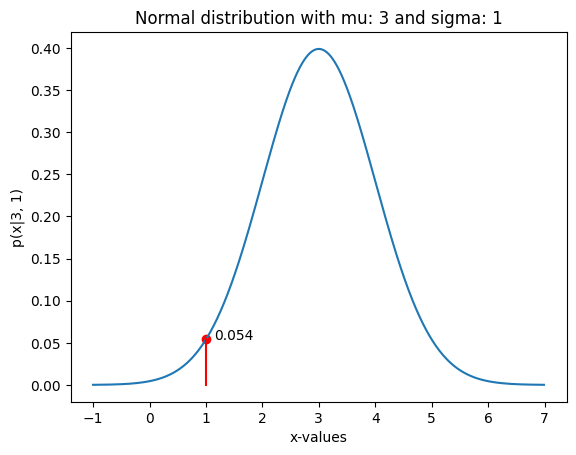

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# normal distribution
mu = 3
sigma = 1

# x-values over range
X = np.arange(mu-4*sigma, mu+4*sigma, 0.01).tolist()
# generate y-values
Y = [g(x, mu, sigma) for x in X]

# plot
plt.figure()
plt.plot(X, Y)
plt.title(f"Normal distribution with mu: {mu} and sigma: {sigma}")
plt.xlabel("x-values")
plt.ylabel(f"p(x|{mu}, {sigma})")

# additional features
ann_x = mu - (2*sigma)
ann_y = g(ann_x, mu, sigma)
x_highlight = [ann_x, ann_x]
y_highlight = [0, ann_y]
plt.plot(x_highlight, y_highlight, color='red')
plt.scatter([ann_x], [ann_y], color='red')
plt.annotate(text=f"{ann_y:.3f}", xy=(ann_x+0.15, ann_y))

***
### Self-check

When you complete the assignment you will submit a draft to canvas, which will only be checked for completeness.  You can then take the self-check quiz to assess both the correctness of your code and your general understanding of the concepts.  If you have errors, or found that you misinterpreted the question, you can revise your assignment and make corrections before submitting the final version.

You may find that to produce the outputs in the tests you need to re-design some of your code or write additional functions.  This is normal and is an important part of the learning processes.

***
### Submission Instructions

Please refer to the Assignment Submission Instructions on canvas under the Pages tab.